In [275]:
# Import Libraries

In [277]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [279]:
# Load the dataset

In [281]:
df=pd.read_csv("Superstore_Sales_Dataset.csv",encoding="latin1")

In [283]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [285]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,CA-2017-119914,05-04-2017,05-09-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,California,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [287]:
df.shape

(9994, 20)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Order Date     9994 non-null   object 
 2   Ship Date      9994 non-null   object 
 3   Ship Mode      9994 non-null   object 
 4   Customer ID    9994 non-null   object 
 5   Customer Name  9994 non-null   object 
 6   Segment        9994 non-null   object 
 7   Country        9994 non-null   object 
 8   City           9994 non-null   object 
 9   State          9994 non-null   object 
 10  Postal Code    9994 non-null   int64  
 11  Region         9994 non-null   object 
 12  Product ID     9994 non-null   object 
 13  Category       9994 non-null   object 
 14  Sub-Category   9994 non-null   object 
 15  Product Name   9994 non-null   object 
 16  Sales          9994 non-null   float64
 17  Quantity       9994 non-null   int64  
 18  Discount

In [291]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


# Data Cleaning

## Step 1: Check Missing Values

In [293]:
df.isnull().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Step 2: Remove Duplicate Rows

In [295]:
df.duplicated().sum()

1

In [299]:
df = df.drop_duplicates()

In [301]:
# Check unique values for 'Ship Mode'
df['Ship Date'].unique()


array(['11-11-2016', '6/16/2016', '10/18/2015', ..., '5/23/2015',
       '1/23/2014', '03-03-2017'], dtype=object)

## Step 3: Fix Date Columns

In [303]:
# Step 1: Clean strings
df['Order Date'] = df['Order Date'].astype(str).str.strip()
df['Ship Date'] = df['Ship Date'].astype(str).str.strip()

# Step 2: Replace dashes with slashes (optional, uniform format)
df['Order Date'] = df['Order Date'].str.replace('-', '/')
df['Ship Date'] = df['Ship Date'].str.replace('-', '/')

# Step 3: Define a parser function for multiple formats
def parse_date(x):
    for fmt in ("%m/%d/%Y", "%d/%m/%Y", "%Y/%m/%d"):
        try:
            return datetime.strptime(x, fmt)
        except:
            continue
    return pd.NaT  # Only NaT if none of the formats match

# Step 4: Apply parser to the columns
df['Order Date'] = df['Order Date'].apply(parse_date)
df['Ship Date'] = df['Ship Date'].apply(parse_date)

# Step 5: Optional - check how many NaT
print("NaT in Order Date:", df['Order Date'].isna().sum())
print("NaT in Ship Date:", df['Ship Date'].isna().sum())


NaT in Order Date: 0
NaT in Ship Date: 0


## Step 3: Handle Invalid Values

In [305]:
df[df['Sales'] <= 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [307]:
df = df[df['Sales'] > 0]

## Step 4: Handle Invalid Values

In [309]:
df[(df['Discount'] < 0) | (df['Discount'] > 1)]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [311]:
df = df[(df['Discount'] >= 0) & (df['Discount'] <= 1)]

In [313]:
df.shape

(9993, 20)

## Step 5: Check Quantity Validity

In [315]:
df[df['Quantity'] <= 0]

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [317]:
df = df[df['Quantity'] > 0]

## Step 6: Create New Clean Columns

In [319]:
df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

## Step 7: Create Loss Flag (Profit Leakage Indicator)

In [323]:
df['Loss_Flag'] = (df['Profit'] < 0).astype(int)

## Step 8: Create Discount Flag

In [325]:
df['Discount_Flag'] = df['Discount'].apply(
    lambda x: 'High Discount' if x >= 0.30 else 'Low/No Discount'
)

## Step 9: Category Classification (High / Medium / Low Profit)

In [327]:
def profit_category(x):
    if x < 0:
        return 'Loss'
    elif x < 10:
        return 'Low Profit'
    elif x < 30:
        return 'Medium Profit'
    else:
        return 'High Profit'

df['Profit_Category'] = df['Profit_Margin'].apply(profit_category)


In [329]:
df[['Profit_Margin','Loss_Flag','Discount_Flag','Profit_Category']].head()

,Profit_Margin,Loss_Flag,Discount_Flag,Profit_Category
0,16.00,0,Low/No Discount,Medium Profit
1,30.00,0,Low/No Discount,High Profit
2,47.00,0,Low/No Discount,High Profit
3,-40.00,1,High Discount,Loss
4,11.25,0,Low/No Discount,Medium Profit


## Exploratory Data Analysis

### 1. Overall Sales vs Profit Analysis

<Axes: xlabel='Order Date'>

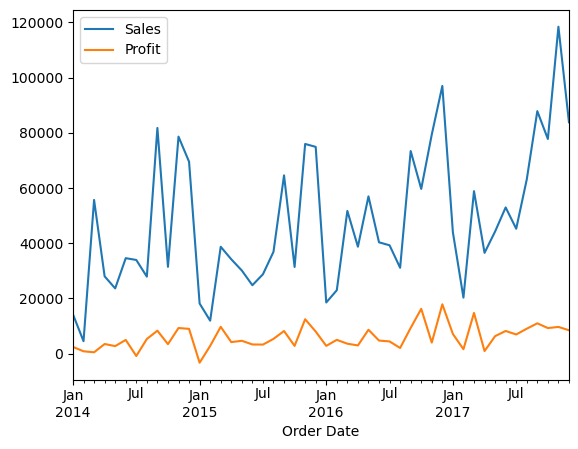

In [331]:
df.groupby(df['Order Date'].dt.to_period('M'))[['Sales','Profit']].sum().plot()

### 2. Product-wise Profit Analysis

In [333]:
df.groupby('Product Name')[['Sales','Profit']].sum().sort_values('Profit')

,Sales,Profit
Product Name,,
Cubify CubeX 3D Printer Double Head Print,11099.963,-8879.9704
Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4589.9730
Cubify CubeX 3D Printer Triple Head Print,7999.980,-3839.9904
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.640,-2876.1156
Bush Advantage Collection Racetrack Conference Table,9544.725,-1934.3976
...,...,...
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color",18374.895,4094.9766
Canon PC1060 Personal Laser Copier,11619.834,4570.9347
Hewlett Packard LaserJet 3310 Copier,18839.686,6983.8836


### 3. Sub-category Analysis

In [335]:
df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values('Profit',ascending=False)

,Sales,Profit
Sub-Category,,
Copiers,149528.0300,55617.8249
Phones,330007.0540,44515.7306
Accessories,167380.3180,41936.6357
Paper,78479.2060,34053.5693
Binders,203412.7330,30221.7633
Chairs,328167.7310,26602.2251
Storage,223843.6080,21278.8264
Appliances,107532.1610,18138.0054
Furnishings,91705.1640,13059.1436


### 4. Region-wise Analysis

In [337]:
df.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678499.8680,91534.8388
South,391721.9050,46749.4303
West,725457.8245,108418.4489


### 5. Analyze Discount Impact on Profit

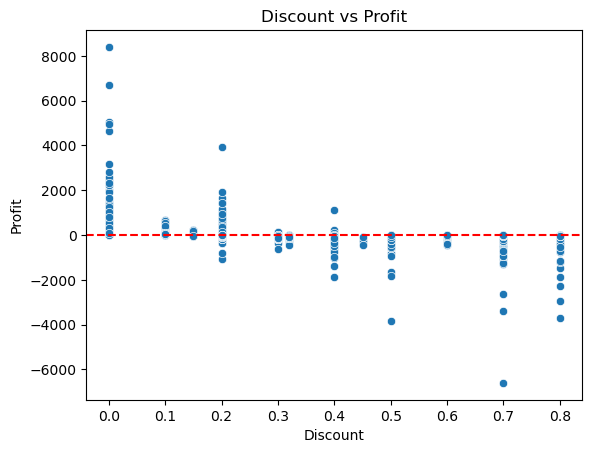

Discount_Flag
High Discount     -97.244251
Low/No Discount    49.037679
Name: Profit, dtype: float64

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.title('Discount vs Profit')
plt.show()

# Average profit by discount flag
df.groupby('Discount_Flag')['Profit'].mean()


### 6. Identify Loss-Making Products

In [341]:
loss_products = df.groupby('Product Name')[['Sales','Profit']].sum()
loss_products[loss_products['Profit'] < 0].sort_values('Profit')


,Sales,Profit
Product Name,,
Cubify CubeX 3D Printer Double Head Print,11099.963,-8.879970e+03
Lexmark MX611dhe Monochrome Laser Printer,16829.901,-4.589973e+03
Cubify CubeX 3D Printer Triple Head Print,7999.980,-3.839990e+03
Chromcraft Bull-Nose Wood Oval Conference Tables & Bases,9917.640,-2.876116e+03
Bush Advantage Collection Racetrack Conference Table,9544.725,-1.934398e+03
...,...,...
"Brites Rubber Bands, 1 1/2 oz. Box",13.068,-5.148000e-01
Rubber Band Ball,58.344,-2.992000e-01
"Acco PRESSTEX Data Binder with Storage Hooks, Dark Blue, 9 1/2"" X 11""",62.946,-1.614000e-01


### 7. Identify Loss-Making Regions

In [343]:
df[df['Loss_Flag']==1].groupby('Region')['Order ID'].count()

Region
Central    741
East       552
South      259
West       318
Name: Order ID, dtype: int64

#### 8. Correlation between Sales','Profit','Discount','Quantity','Profit_Margin'.

In [345]:
# Correlation between numerical columns
corr = df[['Sales','Profit','Discount','Quantity','Profit_Margin']].corr()
print(corr)

                  Sales    Profit  Discount  Quantity  Profit_Margin
Sales          1.000000  0.479067 -0.028197  0.200808       0.003447
Profit         0.479067  1.000000 -0.219481  0.066241       0.223727
Discount      -0.028197 -0.219481  1.000000  0.008680      -0.864454
Quantity       0.200808  0.066241  0.008680  1.000000      -0.005308
Profit_Margin  0.003447  0.223727 -0.864454 -0.005308       1.000000


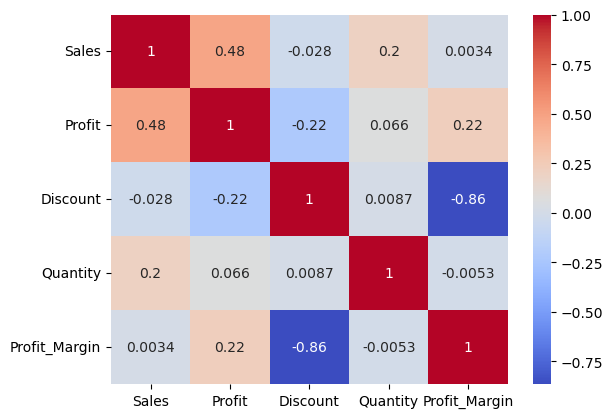

In [347]:
corr = df[['Sales','Profit','Discount','Quantity','Profit_Margin']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


### 9. Profit Margin Distribution

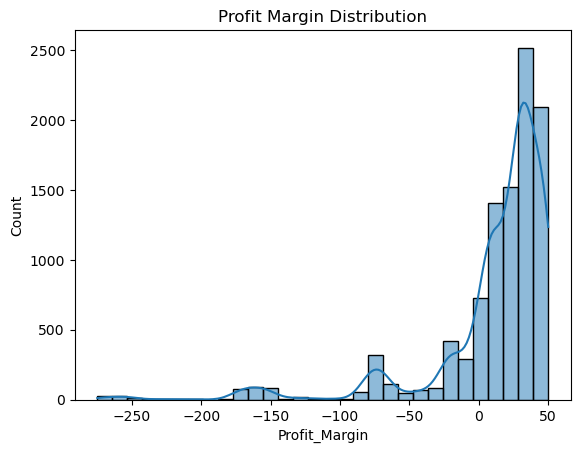

In [349]:
sns.histplot(df['Profit_Margin'], bins=30, kde=True)
plt.title('Profit Margin Distribution')
plt.show()


### 10. Segment-wise Sales & Profit


In [351]:
df.groupby('Segment')[['Sales','Profit']].sum()

,Sales,Profit
Segment,,
Consumer,1.161401e+06,134119.2092
Corporate,7.061464e+05,91979.1340
Home Office,4.293718e+05,60310.7373


In [353]:
segment_analysis = df.groupby('Segment').agg(
    Total_Sales = ('Sales', 'sum'),
    Avg_Profit_Margin = ('Profit_Margin', 'mean')
).reset_index()
segment_analysis

,Segment,Total_Sales,Avg_Profit_Margin
0,Consumer,1.161401e+06,11.204952
1,Corporate,7.061464e+05,12.120261
2,Home Office,4.293718e+05,14.297381


### 11. Discount VS Profit

In [355]:
df.groupby('Discount')[['Profit','Profit_Margin']].mean()

,Profit,Profit_Margin
Discount,,
0.00,66.900292,34.016048
0.10,96.055074,15.579196
0.15,27.288298,3.416290
0.20,24.702572,17.683894
0.30,-45.828401,-11.580278
0.32,-88.560656,-17.429194
0.40,-111.927429,-22.249191
0.45,-226.646464,-45.454545
0.50,-310.703456,-54.909091


#### 12. Shipping time vs profitability

In [357]:
# Average profit margin by shipping days
shipping_profit = df.groupby('Shipping_Days')['Profit_Margin'].mean().reset_index()
shipping_profit.head()

,Shipping_Days,Profit_Margin
0,0,13.450613
1,1,13.157214
2,2,13.335247
3,3,14.740439
4,4,9.841625


## Machine Learning Model

#### Step1: define target variable which has alreday defined 'Loss_Flag'

In [359]:
features = [
    'Sales','Quantity','Discount','Shipping_Days',
    'Category','Sub-Category','Segment','Region'
]

X = df[features]
y = df['Loss_Flag']


#### Step 2: Encode Categorical Data

In [361]:
X = pd.get_dummies(X, drop_first=True)

#### Step 3: Train-Test Split 

In [363]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### Step 4: Random Forest

In [365]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

#### Step 5: Evaluate with BUSINESS METRICS

In [367]:
from sklearn.metrics import classification_report

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1625
           1       0.88      0.83      0.85       374

    accuracy                           0.95      1999
   macro avg       0.92      0.90      0.91      1999
weighted avg       0.95      0.95      0.95      1999



#### Step 7: Feature Importance

In [369]:
import pandas as pd

importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importance.head(10)


Discount                    0.513699
Sales                       0.120896
Quantity                    0.042877
Sub-Category_Paper          0.042258
Shipping_Days               0.038895
Sub-Category_Binders        0.031300
Region_West                 0.023409
Sub-Category_Art            0.022236
Sub-Category_Storage        0.021676
Category_Office Supplies    0.019533
dtype: float64

In [ ]:
# Final Cleaning

In [371]:
df['Profit'] = df['Profit'].round(2)
df['Sales'] = df['Sales'].round(2)
df['Profit_Margin'] = df['Profit_Margin'].round(2)

df = df.dropna()


## Connect SQLite

In [373]:
import sqlite3
conn = sqlite3.connect('sales_leakage.db')


In [375]:
df.to_sql(
    'sales_data',
    conn,
    if_exists='replace',
    index=False
)


9993

In [377]:
pd.read_sql("SELECT * FROM sales_data LIMIT 5", conn)


,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,...,Product Name,Sales,Quantity,Discount,Profit,Shipping_Days,Profit_Margin,Loss_Flag,Discount_Flag,Profit_Category
0,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,3,16.00,0,Low/No Discount,Medium Profit
1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,3,30.00,0,Low/No Discount,High Profit
2,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,...,Self-Adhesive Address Labels for Typewriters b...,14.62,2,0.00,6.87,4,47.00,0,Low/No Discount,High Profit
3,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,7,-40.00,1,High Discount,Loss
4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,...,Eldon Fold 'N Roll Cart System,22.37,2,0.20,2.52,7,11.25,0,Low/No Discount,Medium Profit


#### 1. Loss-making products

In [379]:
query = """
SELECT "Product Name", SUM(Profit) AS Total_Profit
FROM sales_data
GROUP BY "Product Name"
HAVING Total_Profit < 0;
"""
df_loss_products = pd.read_sql(query, conn)
df_loss_products.head()


,Product Name,Total_Profit
0,3.6 Cubic Foot Counter Height Office Refrigerator,-872.07
1,36X48 HARDFLOOR CHAIRMAT,-40.49
2,"3D Systems Cube Printer, 2nd Generation, White",-468.00
3,3M Replacement Filter for Office Air Cleaner f...,-20.47
4,ARKON Windshield Dashboard Air Vent Car Mount ...,-15.58


#### 2. Sales and Profit Distribution by Region

In [381]:
query = """
SELECT Region,
       SUM(Sales) AS Total_Sales,
       SUM(Profit) AS Total_Profit
FROM sales_data
GROUP BY Region;
"""

region_profit = pd.read_sql_query(query, conn)
region_profit


,Region,Total_Sales,Total_Profit
0,Central,501239.76,39706.24
1,East,678499.93,91534.56
2,South,391721.83,46749.49
3,West,725457.76,108418.31


#### 3. Discount impact on profit

In [383]:
query = """
SELECT Discount_Flag,
       SUM(Sales) AS Total_Sales,
       SUM(Profit) AS Total_Profit,
       AVG(Profit_Margin) AS Avg_Margin
FROM sales_data
GROUP BY Discount_Flag;
"""

discount_impact = pd.read_sql_query(query, conn)
discount_impact


,Discount_Flag,Total_Sales,Total_Profit,Avg_Margin
0,High Discount,362488.70,-135364.22,-78.502270
1,Low/No Discount,1934430.58,421772.82,26.685404


#### 4. Segment-wise profit

In [385]:
query = """
SELECT Segment,
       SUM(Sales) AS Total_Sales,
       SUM(Profit) AS Total_Profit,
       AVG(Profit_Margin) AS Avg_Margin
FROM sales_data
GROUP BY Segment;
"""

segment_profit = pd.read_sql_query(query, conn)
segment_profit


,Segment,Total_Sales,Total_Profit,Avg_Margin
0,Consumer,1161401.12,134118.64,11.204955
1,Corporate,706146.32,91979.13,12.120238
2,Home Office,429371.84,60310.83,14.297396


#### 5. Shipping time vs profit

In [387]:
query = """
SELECT Shipping_Days,
       AVG(Profit) AS Avg_Profit
FROM sales_data
GROUP BY Shipping_Days
ORDER BY Shipping_Days;
"""

shipping_profit = pd.read_sql_query(query, conn)
shipping_profit


,Shipping_Days,Avg_Profit
0,0,29.645395
1,1,20.436721
2,2,39.818546
3,3,26.742159
4,4,25.656859
5,5,27.078469
6,6,27.660889
7,7,32.740676


In [389]:
df_final = df.copy()   # cleaned + feature engineered + ML-ready

In [391]:
df_final.to_csv("Superstore_Cleaned_Final.csv", index=False)

In [393]:
conn.close()